In [4]:
!pip install pandas
!pip install numpy
!pip install statsmodels
!pip install matplotlib
!pip install seaborn
!pip install scipy

In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
from sklearn.linear_model import LinearRegression 


In [6]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)


In [7]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [8]:
boston_df.shape

(506, 14)

In [9]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


[Text(0.5, 0, "Median value of owner-occupied homes in $1000's"),
 Text(0, 0.5, 'Boxplot'),
 Text(0.5, 1.0, 'boxplot for the Median value of owner-occupied homes')]

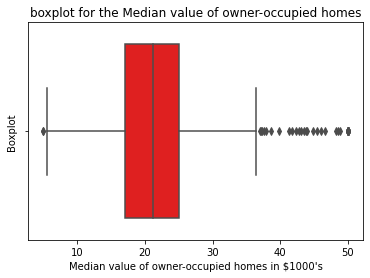

In [10]:
#Provide boxplot for the Median value of owner-occupied homes
homeOwner = sns.boxplot(x = 'MEDV', color = 'red', data = boston_df)
homeOwner.set(xlabel = "Median value of owner-occupied homes in $1000's", ylabel = 'Boxplot',title = 'boxplot for the Median value of owner-occupied homes')

Explaination: The boxplot shows the median value of owner-occupied homes in $1000's is about 21

[Text(0.5, 0, 'Charles River Dummy variable (1 if tract bounds river; 0 otherwise)'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Histopgram for the Charles River variable')]

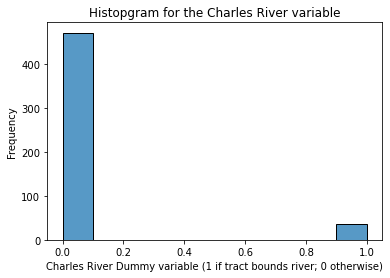

In [11]:
#provide histogram for the charles river variable
histogram = sns.histplot(boston_df['CHAS'])
histogram.set(xlabel = 'Charles River Dummy variable (1 if tract bounds river; 0 otherwise)', ylabel = 'Frequency', title = 'Histopgram for the Charles River variable')


Explaination: The histogram shows the frequency of Charles river dummy variable (1 if tract bounds river; 0 otherwise)

[Text(0.5, 0, 'Proprtion of woner-occupied units built prior to 1940'),
 Text(0, 0.5, "Median value of owner-occupied homes in $1000's"),
 Text(0.5, 1.0, 'Boxplot for MEDV variable vs the AGE variable')]

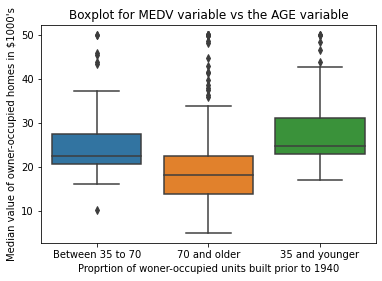

In [12]:
#provide a boxplot for the MEDV  and AGE. Discretize the age into three groups: 35 and younger, 35-70, and 70 and older
boston_df.loc[boston_df['AGE'] <= 35, 'Group_byAge'] = '35 and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Group_byAge'] ='Between 35 to 70'
boston_df.loc[boston_df['AGE'] >=70, 'Group_byAge'] = '70 and older'

boxplotMEDV_AGE = sns.boxplot(x = 'Group_byAge', y = 'MEDV', data = boston_df)
boxplotMEDV_AGE.set(xlabel = 'Proprtion of woner-occupied units built prior to 1940',
                    ylabel = "Median value of owner-occupied homes in $1000's",
                    title = 'Boxplot for MEDV variable vs the AGE variable')



Explaination: These boxplot show different median by group of age between the MEDV vs AGE. The group Between 35 to 70 is about 22, group 70 and older is about 19 and the group of 35 and younger is about 23.

[Text(0.5, 0, 'Proportion of non-retail business acres per town'),
 Text(0, 0.5, 'Nitric oxides concentration (parts per 10 million)'),
 Text(0.5, 1.0, 'Scatter Plot of NOX vs INDUS')]

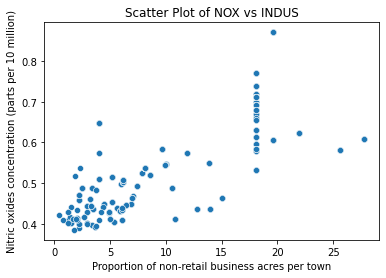

In [13]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
scatterPlot = sns.scatterplot(x = 'INDUS', y = 'NOX', data = boston_df)
scatterPlot.set(xlabel = 'Proportion of non-retail business acres per town', ylabel= 'Nitric oxides concentration (parts per 10 million)', title = "Scatter Plot of NOX vs INDUS")

Explaination: The scatter plot shows the positive correlation between NOX and INDUS.

[Text(0.5, 0, 'Pupil-teacher ratio by town'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Histogram for the pupil to teacher ratio variable')]

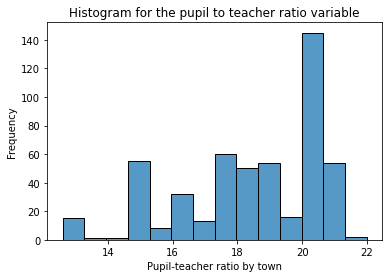

In [14]:
#Create a histogram for the pupil to teacher ratio variable
histogram2 = sns.histplot(boston_df['PTRATIO'])
histogram2.set(xlabel = 'Pupil-teacher ratio by town', ylabel = 'Frequency', title = 'Histogram for the pupil to teacher ratio variable')

Explaination: The histogram shows the frequency relation of pupil-teacher ratio by town. It indicates the highest ratio is from 20 to 22.

Q1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-tes for independent samples)

Hypothesis: 

𝐻0: µ1 = µ2 ("There is no different in median value of houses bounded by the Charles river")

𝐻1: µ1 ≠ µ2 ("There is a differnt in median value of houses bounded by the Charles river")

In [15]:
#use Levene's Test
scipy.stats.levene(boston_df['MEDV'], boston_df['CHAS'], center = 'mean')

LeveneResult(statistic=532.6811164157666, pvalue=5.402535119732986e-95)

In [16]:
#use the ttest_ind from the scipy_stats library
scipy.stats.ttest_ind(boston_df['MEDV'],boston_df['CHAS'], equal_var = True)

Ttest_indResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305)

Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river

Q2.Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypothesis:

𝐻0:µ1=µ2=µ3  (the three population means are equal)

𝐻1: At least one of the means differ

In [18]:
#Categorize by age 
boston_df.loc[boston_df['AGE'] <= 35, 'Group_byAge'] = '35 and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Group_byAge'] ='Between 35 to 70'
boston_df.loc[boston_df['AGE'] >=70, 'Group_byAge'] = '70 and older'

#Test for equality of variance
scipy.stats.levene(boston_df[boston_df['Group_byAge'] == '35 and younger']['MEDV'],
                  boston_df[boston_df['Group_byAge'] == 'Between 35 to 70']['MEDV'],
                  boston_df[boston_df['Group_byAge']=='70 and older']['MEDV'], center = 'mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [23]:
#Separate the three samples
thirtyFive_Lower = boston_df[boston_df['Group_byAge'] == '35 and younger']['MEDV']
Btw35_70 = boston_df[boston_df['Group_byAge'] == 'Between 35 to 70']['MEDV']
seventy_Older = boston_df[boston_df['Group_byAge'] == '70 and older']['MEDV']


In [24]:
#Now, Run a one way ANOVA

f_statistic, p_value = scipy.stats.f_oneway(thirtyFive_Lower, Btw35_70, seventy_Older)
print('F_statistic: {0}, P-Value: {1}'.format(f_statistic,p_value))

F_statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

Q3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Hypothesis: 

𝐻0:  There is no relationship between Nitric oxide concentration and proportion of non-retail business acres per town
    
𝐻1:  There is relationship between Nitric oxide concentration and proportion of non-retail business acres per town

In [26]:
scipy.stats.pearsonr(boston_df['INDUS'],boston_df['NOX'])

(0.7636514469209151, 7.913361061238693e-98)

Conclusion: Since the p-value(sig.(2-tailed) <0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentration and proportion of non-retails business acres per town.

Q4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Hypothesis: 

𝐻0: µ1 = 0(There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes)

𝐻1: µ1 ≠ 0 (There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes)



In [28]:
#Regression with T-Test:
# X is the input variables(or independent variables)
x = boston_df['DIS']

#Y is the target/dependent variable
y = boston_df['MEDV']

## add an intercept(beta_0) to the model
x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
predictions = model.predict(x)

#print out statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 22 Aug 2021   Prob (F-statistic):           1.21e-08
Time:                        01:52:43   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: like the t-test, the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidentce that There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. The coeffient of DIS is 1.0916 which indicates positive increase.